In [1]:
import pandas as pd
import os

import bokeh
from bokeh.io import output_notebook, curdoc, reset_output
from bokeh.plotting import figure, output_file, show, ColumnDataSource

import numpy as np
import scipy.special
# used to standardize plot size below
GLOBAL_WIDTH = 800
GLOBAL_HEIGHT = 600

# display notebooks inline
output_notebook() 
import bokeh.plotting as bk
from bokeh.models import Span, Label
from bokeh.layouts import row
from bokeh.sampledata.autompg import autompg as df
import matplotlib.pyplot as plt

Loading BokehJS ...

In [2]:
pp = pd.read_csv('../data/picasso.csv')
pp2 = pd.read_csv('../data/henri_dic.csv')
pp = pp.rename(columns={'Unnamed: 0': 'Picturesource', '0': 'Painting'})
pp2 = pp2.rename(columns={'Unnamed: 0': 'Picturesource', '0': 'Painting'})

In [3]:
pdf = pd.read_csv('../data/picasso_data.csv')
mdf = pd.read_csv('../data/matisse_data.csv')
pdf['Picturesource'] = pdf['Picturesource'].apply(lambda x: os.path.join(os.pardir, 'data/picasso', x))
pdf['Painting'] = pp['Painting'].apply(lambda x: x[2:-8])
mdf['Picturesource'] = mdf['Picturesource'].apply(lambda x: os.path.join(os.pardir, 'data/henri-matisse', x))
mdf['Painting'] = pp2['Painting'].apply(lambda x: x[2:-8])
pdf_mistress=pdf[pdf["Portrait"]==1]
pdf_maternity=pdf[pdf["Portrait"]==0]
mdf_mistress=mdf[mdf["Portrait"]==1]
mdf_maternity=mdf[mdf["Portrait"]==0]

In [4]:
pdf_mistress.head()

Picturesource  \
1    ../data/picasso/images-works-56_s.jpg   
2  ../data/picasso/images-works-1513_s.jpg   
3  ../data/picasso/images-works-3570_s.jpg   
4  ../data/picasso/images-works-1459_s.jpg   
5   ../data/picasso/images-works-151_s.jpg   

                                            Painting  Year  Portrait  \
1                                      Self-Portrait  1907       1.0   
2                                   Absinthe Drinker  1938       1.0   
3                       Self-Portrait in Blue Period  1902       1.0   
4  Les Demoiselles d'Avignon (The Young Ladies of...  1939       1.0   
5                                          Maternity  1932       1.0   

   RMS_contrast  AVG_entropy  RMS_contrast_log  AVG_entropy_log  erotic_charge  
1      0.197231     5.041706         -2.342045         2.333912      -0.004066  
2      0.191595     5.023209         -2.383869         2.328609      -0.027630  
3      0.145416     5.223912         -2.781742         2.385131      -0.198306  
4      0.262751     5.015289         -1.928229         2.326333       0.199052  
5      0.232645     4.424366         -2.103797         2.145471       0.020837

In [18]:
mdf_maternity

Picturesource  \
3   ../data/henri-matisse/paintings-thmbnls150-cs.jpg   
4   ../data/henri-matisse/paintings-thmbnls150-dr.jpg   
5   ../data/henri-matisse/paintings-thmbnls150-zd.jpg   
11  ../data/henri-matisse/paintings-thmbnls150-ea.jpg   

                             Painting  Year  Portrait  RMS_contrast  \
3                     Vase with Fruit  1905       0.0      0.173126   
4               Glimpse of Notre Dame  1905       0.0      0.202277   
5        Nude with a White Wash Towel  1905       0.0      0.229223   
11  Woman with a Hat (Madame Matisse)  1911       0.0      0.132826   

    AVG_entropy  RMS_contrast_log  AVG_entropy_log  erotic_charge  
3      5.002342         -2.530106         2.322604      -0.103751  
4      5.171739         -2.305596         2.370650       0.032527  
5      5.315706         -2.125175         2.410261       0.142543  
11     4.405845         -2.912389         2.139419      -0.386485

In [6]:
p_meanRMS=pdf.groupby('Year').mean()
m_meanRMS=mdf.groupby('Year').mean()

Text(0, 0.5, 'Count(#)')

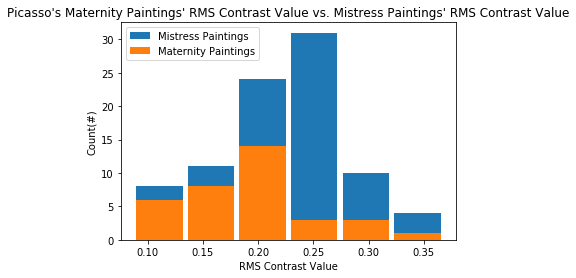

In [7]:
bins=np.linspace(min(pdf['RMS_contrast']), max(pdf['RMS_contrast']), 7)
pdf_mistress['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Mistress Paintings")
pdf_maternity['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Maternity Paintings")
plt.title("Picasso's Maternity Paintings' RMS Contrast Value vs. Mistress Paintings' RMS Contrast Value")
plt.legend()
plt.xlabel('RMS Contrast Value')
plt.ylabel('Count(#)')

Text(0, 0.5, 'Count(#)')

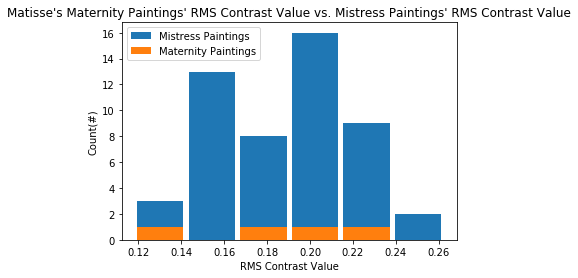

In [8]:
bins=np.linspace(min(mdf['RMS_contrast']), max(mdf['RMS_contrast']), 7)
mdf_mistress['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Mistress Paintings")
mdf_maternity['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Maternity Paintings")
plt.title("Matisse's Maternity Paintings' RMS Contrast Value vs. Mistress Paintings' RMS Contrast Value")
plt.legend()
plt.xlabel('RMS Contrast Value')
plt.ylabel('Count(#)')

Text(0, 0.5, 'Count(#)')

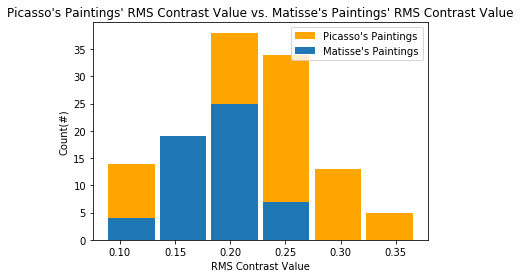

In [9]:
bins=np.linspace(min(pdf['RMS_contrast']), max(pdf['RMS_contrast']), 7)
pdf['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Picasso's Paintings", color='orange')
mdf['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Matisse's Paintings")
plt.title("Picasso's Paintings' RMS Contrast Value vs. Matisse's Paintings' RMS Contrast Value")
plt.legend()
plt.xlabel('RMS Contrast Value')
plt.ylabel('Count(#)')

In [10]:
x = p_meanRMS.index
y = p_meanRMS['RMS_contrast']

x2 = m_meanRMS.index
y2 = m_meanRMS['RMS_contrast']


output_notebook()

p = figure(title="Compare Mean RMS contrast overyear", x_axis_label='Year', y_axis_label='Mean_RMS_contrast')

p.line(x, y, legend_label="Picasso_Mean_RMS_contrast_overyear", line_width=2)
p.line(x2, y2, legend_label="Matisse_Mean_RMS_contrast_overyear", line_width=2,line_color="#f46d43")

show(p)

Loading BokehJS ...

In [11]:
x = p_meanRMS.index
y = p_meanRMS['erotic_charge']

x2 = m_meanRMS.index
y2 = m_meanRMS['erotic_charge']


# display inline
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="Compare Erotic Charge overyear", x_axis_label='Year', y_axis_label='erotic_charge')

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Picasso_erotic_charge_overyear", line_width=2)
p.line(x2, y2, legend_label="Matisse_erotic_charge_overyear", line_width=2,line_color="#f46d43")

# show the results
show(p)

Loading BokehJS ...

In [12]:
x = pdf['RMS_contrast']
y = pdf['AVG_entropy']

x2 = mdf['RMS_contrast']
y2 = mdf['AVG_entropy']

p = figure(title="Picasso & Matisso's paintings' RMS contrast value vs. AVG_entropy",plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, x_axis_label='RMS_contrast', y_axis_label='AVG_entropy')

p.circle(x, y, size=5, color="red", alpha=0.9,legend_label="Picasso")
p.circle(x2, y2, size=5, color="blue", alpha=0.9,legend_label="Matisso")

show(p)

In [13]:
x = pdf_mistress['RMS_contrast']
y = pdf_mistress['AVG_entropy']

x2 = pdf_maternity['RMS_contrast']
y2 = pdf_maternity['AVG_entropy']

p = figure(title="Picasso 's paintings' RMS contrast value vs. AVG_entropy",plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, x_axis_label='RMS_contrast', y_axis_label='AVG_entropy')

p.circle(x, y, size=5, color="red", alpha=0.9,legend_label="Mistress")
p.circle(x2, y2, size=5, color="blue", alpha=0.9,legend_label="Maternity")

show(p)

In [14]:
x = mdf_mistress['RMS_contrast']
y = mdf_mistress['AVG_entropy']

x2 = mdf_maternity['RMS_contrast']
y2 = mdf_maternity['AVG_entropy']

p = figure(title="Matisse 's paintings' RMS contrast value vs. AVG_entropy",plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, x_axis_label='RMS_contrast', y_axis_label='AVG_entropy')

p.circle(x, y, size=5, color="red", alpha=0.9,legend_label="Mistress")
p.circle(x2, y2, size=5, color="blue", alpha=0.9,legend_label="Maternity")

show(p)

In [19]:
source = ColumnDataSource(data=dict(
    x=pdf['Year'],
    y=pdf['RMS_contrast_log'],
    desc=pdf['Painting'],
    imgs=pdf['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdf.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdf['Year'],
    y2=mdf['RMS_contrast_log'],
    desc=mdf['Painting'],
    imgs=mdf['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdf.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">RMS Contrast Log Value:</span>
            <span style="font-size: 10px; color: #696;">$y</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Paintings' RMS contrast log Value Throughout Year",x_axis_label='Year', y_axis_label='RMS_contrast_log')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,color = "blue",legend_label="Matisse")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)

In [20]:
source = ColumnDataSource(data=dict(
    x=pdf['Year'],
    y=pdf['AVG_entropy_log'],
    desc=pdf['Painting'],
    imgs=pdf['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdf.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdf['Year'],
    y2=mdf['AVG_entropy_log'],
    desc=mdf['Painting'],
    imgs=mdf['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdf.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">AVG Entropy Log</span>
            <span style="font-size: 10px; color: #696;">$y</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Paintings' AVG Entropy Log Value Throughout Year",x_axis_label='Year', y_axis_label='AVG_entropy_log')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,color = "blue",legend_label="Matisse")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)

In [21]:
source = ColumnDataSource(data=dict(
    x=pdf['Year'],
    y=pdf['erotic_charge'],
    desc=pdf['Painting'],
    imgs=pdf['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdf.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdf['Year'],
    y2=mdf['erotic_charge'],
    desc=mdf['Painting'],
    imgs=mdf['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdf.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Erotic Charge Value:</span>
            <span style="font-size: 10px; color: #696;">$y{0.000}</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Paintings' Erotic Charge Value Throughout Year",x_axis_label='Year', y_axis_label='erotic_charge')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,color ="blue",legend_label="Matisse")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)